## Introduction

I will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
*   Triaxial angular velocity from the gyroscope.
*   A 561-feature vector with time and frequency domain variables.
*   Its activity label.

More information about the features is available on the website shown above.


In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# disable warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Loading Data

In [3]:
data = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv")
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


# Checking Data types, missing values, features values scales

In [4]:
# check data types
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

### missing values

In [5]:
data.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Activity                                0
Length: 562, dtype: int64

In [6]:
data.isna().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Activity                                0
Length: 562, dtype: int64

#### No missing data in the dataset

### Dataset statestitcs & features scales

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",10299.0,0.017683,0.616188,-1.0,-0.493108,0.017192,0.536137,1.0
"angle(tBodyGyroJerkMean,gravityMean)",10299.0,-0.009219,0.484770,-1.0,-0.389041,-0.007186,0.365996,1.0
"angle(X,gravityMean)",10299.0,-0.496522,0.511158,-1.0,-0.817288,-0.715631,-0.521503,1.0
"angle(Y,gravityMean)",10299.0,0.063255,0.305468,-1.0,0.002151,0.182028,0.250790,1.0


In [8]:
# Checking if all the features values are between -1 -> +1
float_columns = (data.dtypes == np.float)
print((data.loc[:, float_columns].max() == 1).all())
print((data.loc[:, float_columns].min() == -1).all())

True
True


The features are already normalized and scaled between -1 & 1

###  Encode the target variable "Activity" classes to integer values

- sklearn library modules do not accept categorical values, so the target labels will be converted to int values

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data['Activity'])

In [10]:
pd.concat([data['Activity'].value_counts(), 
           round(data['Activity'].value_counts(normalize=True), 2)], axis=1)

,Activity,Activity
0,1944,0.19
2,1906,0.19
1,1777,0.17
3,1722,0.17
5,1544,0.15
4,1406,0.14


The output classes are almost evenly distributed as seen from thr proportions, the dataset is largely balanced.  

In [11]:
# checking the encoder classes
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

#### As seen, the target classes are converted to int values:

        ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
        
    to  [   0,         1,         2,          3,               4,                 5]
        
        
        

### Separating the input & output variables

In [12]:
# Input variables X
feature_columns = [x for x in data.columns if x != 'Activity']
X = data[feature_columns]
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
# Output variable y
y = data.Activity
y

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, Length: 10299, dtype: int32

### Forming the Training & Testing sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the datasets sizes
pd.DataFrame({"X_train":X_train.shape[0], "X_test":X_test.shape[0], 
              "y_train":y_train.shape[0], "y_test":y_test.shape[0]}, index=['size'])

,X_train,X_test,y_train,y_test
size,7209,3090,7209,3090


## Using Gradient Boosting Algorithm

- I'll set max_features to 5
- n_estimators will be varying through a FOR loop from 15 -> 600 trees
- will use accuracy_score to evaluate each case of this model
- all other hyperparamters will set to thier defaults

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# create error empty list
error_list = []

# iterate through number of trees
tree_list = [15, 25, 50, 100, 200, 400, 600]

for n_trees in tree_list:
    
    # instantiate  GradientBoostingClassifier object
    GBC = GradientBoostingClassifier(n_estimators=n_trees, 
                                     max_features=5, 
                                     random_state=42)
    
    # fit the model
    print(f'fitting the model with n_trees= {n_trees}')
    GBC.fit(X_train, y_train)
    y_pred = GBC.predict(X_test)
    
    # estimate errors
    error = 1 - accuracy_score(y_test, y_pred)
    error_list.append(pd.Series({"n_trees":n_trees, "error":error}))

# comparing errors and n_trees in data Frame
error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')
error_df   

fitting the model with n_trees= 15
fitting the model with n_trees= 25
fitting the model with n_trees= 50
fitting the model with n_trees= 100
fitting the model with n_trees= 200
fitting the model with n_trees= 400
fitting the model with n_trees= 600


,error
n_trees,
15.0,0.104854
25.0,0.072492
50.0,0.040129
100.0,0.024595
200.0,0.015210
400.0,0.014239
600.0,0.012621


### Plotting the results

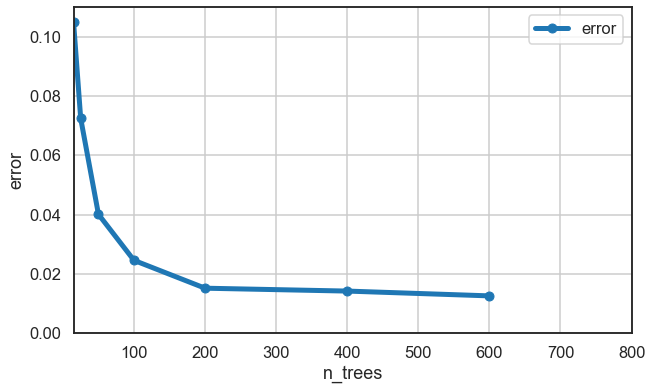

In [16]:
sns.set_context('talk')
sns.set_style('white')

ax = error_df.plot(marker='o', linewidth=5, figsize=(10,6))

# setting x-axis & y-axis
ax.set(xlabel='n_trees', ylabel='error')
ax.set_xlim(15, 800)
ax.set_ylim(0, 0.11)
ax.grid(True)

it's observed that after using 400 trees there's no significant drop in the error

### Applying GridSearh with cross validaton technique

Will loop through number of parameters to estimate the best combination for the best performance
- use n_estimators = 400 tress
- loop through learning rate range of values [0.001, 0.01, 0.1]
- subsamples values range [0.5, 1]
- max_features range [2, 3, 4, 5]

In [17]:
from sklearn.model_selection import GridSearchCV

# the hyperparamters will be looped over
param_grid = {"learning_rate":[0.001, 0.01, 0.1],
              "subsample": [0.5, 1],
              "max_features":[2, 3, 4, 5]}

# instantiate GridSearchCV object
GV_GBC = GridSearchCV(GradientBoostingClassifier(n_estimators=400, random_state=42),
                      param_grid=param_grid,
                     scoring='accuracy',
                     n_jobs=-1)  # using full parallel processing power, 
                                 # not very useful in Boosting models as these models are sequntial in nature

# activate the GridSearchCV on the training set
GV_GBC = GV_GBC.fit(X_train, y_train)

In [18]:
# the best combination of hyperparameters for best model
print(f"{GV_GBC.best_estimator_}, Learning rate= {GV_GBC.best_estimator_.learning_rate}")

GradientBoostingClassifier(max_features=5, n_estimators=400, random_state=42,
                           subsample=0.5), Learning rate= 0.1


In [19]:
# Classification report is a convenient error metrics for multi-class cases
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.98      0.96      0.97       563
           2       0.97      0.98      0.97       547
           3       1.00      1.00      1.00       539
           4       1.00      0.99      1.00       420
           5       0.99      1.00      0.99       424

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



- Generally the model has high scores over all metrics, with overall accuracy = 99%
- but there is some confusion in classifying case:1 'setting' & case:2 'standing'

[Text(22.5, 0.5, 'Actual'), Text(0.5, 4.5, 'Predictions')]

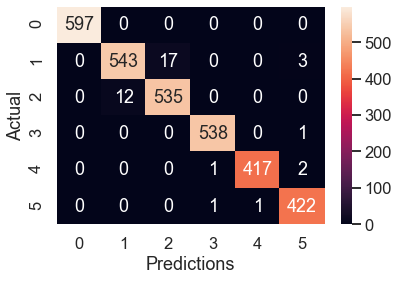

In [20]:
#### Plotting the Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, fmt='d', annot=True)
ax.set(xlabel='Predictions', ylabel='Actual')

as seen from the matrix,
- 17 cases model predicted as 2 'standing' but actualy was 1 'sitting'
- 12 cases model predicted as 1 'sitting' but actualy was 2 'standing'

## Using AdaBoost Algorithm


- n_estimators will be varying through a FOR loop from 100 -> 200 trees
- will use accuracy_score to evaluate each case of this model
- Learning rate range [.001, 0.01, 0.1]
- all other hyperparamters will set to thier defaults

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the classifier object
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)) # max_depth can be changed -> 2,3,..

# build the GridSearchCV object
param_grid = {"learning_rate":[.001, 0.01],
              "n_estimators":[100, 200]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid,
                      scoring="accuracy",
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

#pickle.dump(GV_ABC, open("GV_ABC.p", 'wb'))
# to retrieve the object
#GV_ABC = pickle.load(open("GV_ABC.p", 'rb'))

# the best combination of hyperparameters for best model
print(f"{GV_ABC.best_estimator_}, Learning rate= {GV_ABC.best_estimator_.learning_rate}")

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100), Learning rate= 0.01


In [ ]:
########## Classification report is a convenient error metrics for multi-class cases ##########
from sklearn.metrics import classification_report

y_pred = GV_ABC.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
########## Plotting the Confusion matrix ##########
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, fmt='d', annot=True)
ax.set(xlabel='Predictions', ylabel='Actual')

## Using Stacking Algorithm

- Build logistic regression model with L2 regularization
- use VotingClssifire to combine the regression model along with GradientBoost and AdaBoost models

In [ ]:
from sklearn.linear_model import LogisticRegression

# use L2 regularization
LR_L2 = LogisticRegression(penalty='l2',
                           solver='saga', # 'saga' are faster for large datsets, ours are > 10K observations
                           max_iter=500).fit(X_train, y_train)


In [ ]:
y_pred = LR_L2.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
########## Plotting the Confusion matrix ##########
cm = confusion_matrix(y_test, y_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, fmt='d', annot=True)
ax.set(xlabel='Predictions', ylabel='Actual')

In [ ]:

from sklearn.ensemble import VotingClassifier

# build the combined models
estimators = [("LR_L2",LR_L2), 
              ("GBC",GBC)]

VC = VotingClassifier(estimators,
                      voting='soft')
VC = VC.fit(X_train, y_train)

In [ ]:
y_pred = VC.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
########## Plotting the Confusion matrix ##########
cm = confusion_matrix(y_test, y_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, fmt='d', annot=True)
ax.set(xlabel='Predictions', ylabel='Actual')

The stacking model combined of (Logistic Regression % Gradient Boost) is slightly performing better than the GridSearchCV Gradient Boost model